# CW - Solutions

# Q1(a) 
Read in the csv file 'Football.csv' to create a dataframe. Remove the column named 'Referee'. In the 'League_Division' column remove the letter 'E' from the data entries. Create a function to convert all of the dates to a single number such that dates in the first 7 months take the last 2 digits of the year minus 11 and the dates in the last 5 months of the year take the last 2 digits of the year minus 10. (8 marks)

In [134]:
# Importing required libraries

import pandas as pd #for dataframes
import matplotlib.pyplot as plt # for plotting graphs

# Creating dataframe from the provided CSV

football_Results = pd.read_csv("Football.csv")


# Removing Referee column from the dataframe

del football_Results['Referee']

# Removing E from all the entires in "League_Division" column
football_Results['League_Division'] = football_Results['League_Division'].str.replace("E", "")

# Definition of function to apply the conversion of date to number
def date_converter(date):
    date_split = date.split("/")
    month = date_split[1]
    if (int(month) < 7):
        new_year = int(date_split[2][-2:]) - 11
    else:
        new_year = int(date_split[2][-2:]) - 10
    return new_year

# Applying the converter function to convert dates to a number
football_Results['Date'] = football_Results['Date'].apply(date_converter)

In [135]:
football_Results

,League_Division,Date,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,0,0,Bolton,Fulham,0,0,D,0.0,0.0,D,...,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0
1,0,0,Tottenham,Man City,0,0,D,0.0,0.0,D,...,18.0,7.0,13.0,16.0,10.0,3.0,0.0,2.0,0.0,0.0
2,0,0,Birmingham,Liverpool,0,0,D,0.0,0.0,D,...,3.0,8.0,8.0,9.0,4.0,3.0,1.0,0.0,0.0,0.0
3,0,0,Birmingham,Wigan,0,0,D,0.0,0.0,D,...,4.0,10.0,12.0,18.0,3.0,7.0,2.0,3.0,1.0,0.0
4,0,0,Fulham,Everton,0,0,D,0.0,0.0,D,...,2.0,7.0,15.0,13.0,4.0,5.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,3,12,Stockport,Hartlepool,1,1,D,1.0,0.0,H,...,10.0,3.0,11.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0
26200,3,12,Sutton,Carlisle,1,1,D,1.0,0.0,H,...,2.0,2.0,9.0,11.0,5.0,2.0,0.0,1.0,0.0,0.0
26201,3,12,Swindon,Crawley Town,2,1,H,2.0,0.0,H,...,8.0,4.0,11.0,13.0,7.0,3.0,1.0,2.0,0.0,0.0
26202,3,12,Tranmere,Northampton,0,1,A,0.0,1.0,A,...,0.0,1.0,8.0,5.0,9.0,8.0,1.0,1.0,0.0,0.0


# Q1(b) 
Using Matplotlib

(i) Create a Histogram of the number of games with a fixed number of goals scored by the home team in a game using 10 bins. (2 marks)

(ii) Create a Histogram of the number of games with a fixed number of goals scored by the away team in a game using 10 bins. (2 marks)

(iii) Create a Histogram of the number of games with a fixed number of goals scored in total in a game using 10 bins. (3 marks)

Comment on the mode in each histogram. (1 mark)

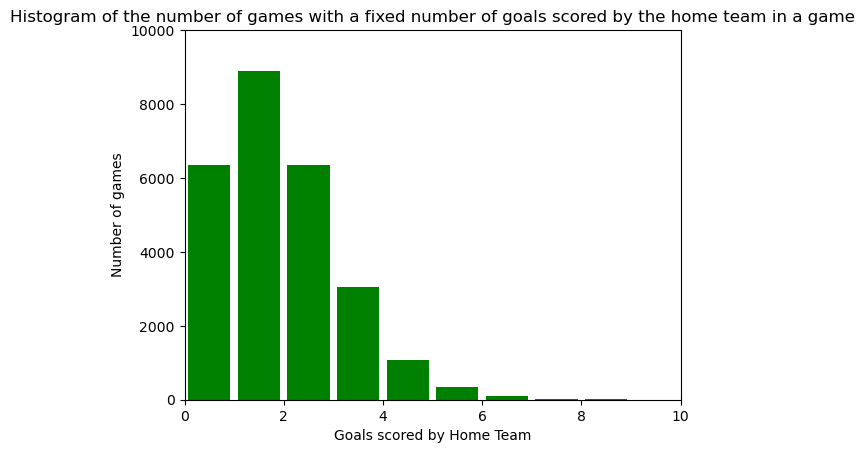

In [136]:
# Plotting graph for fixed number of goals scored by the home team in a game
plt.hist(football_Results['Full Time Home Team Goals'], bins= 10, range=(0,10), rwidth=0.85, color='green')
plt.title("Histogram of the number of games with a fixed number of goals scored by the home team in a game")
plt.xlim(0,10)
plt.ylim(0,10000)
plt.xlabel("Goals scored by Home Team")
plt.ylabel("Number of games")
plt.show()

**Comment:** *From the above plot drawn from the dataset provided, It can be inferred that most of the football matches ended with Home teams scoring 1 goal*

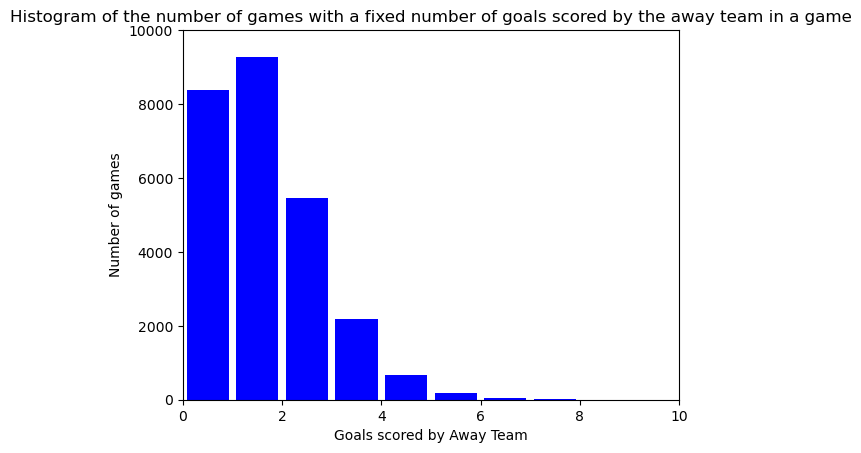

In [137]:
# Plotting graph for fixed number of goals scored by the away team in a game
plt.hist(football_Results['Full Time Away Team Goals'], bins=10, range=(0,10), rwidth=0.85, color='blue')
plt.title("Histogram of the number of games with a fixed number of goals scored by the away team in a game")
plt.xlim(0,10)
plt.ylim(0,10000)
plt.xlabel("Goals scored by Away Team")
plt.ylabel("Number of games")
plt.show()

**Comment:** *From the above plot drawn from the dataset provided, It can be inferred that most of the football matches ended with Away teams scoring 1 goal, which is same as the inference from the Home team goal scored data*

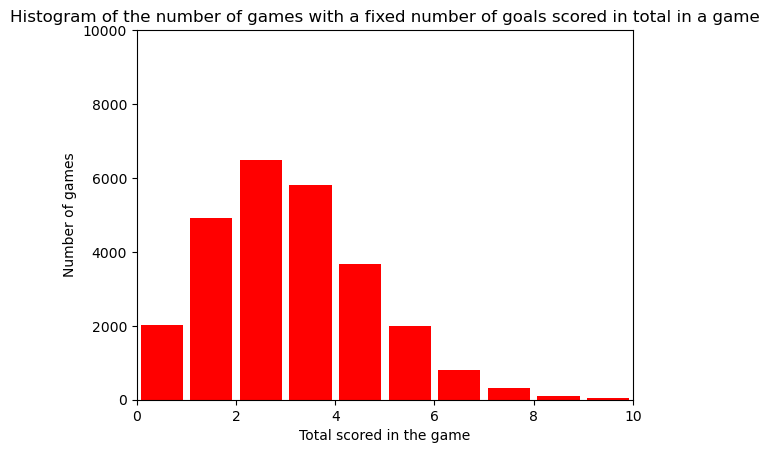

In [138]:
# Introducing column for total goals scored as a sum of full time home team goals and full time away team goals

football_Results['Total goals scored'] = football_Results['Full Time Home Team Goals'] + football_Results['Full Time Away Team Goals']

# Plotting graph for fixed number of goals scored in total in a game

plt.hist(football_Results['Total goals scored'], bins =10, range=(0,10), rwidth=0.85, color='red')
plt.title("Histogram of the number of games with a fixed number of goals scored in total in a game")
plt.xlim(0,10)
plt.ylim(0,10000)
plt.xlabel("Total scored in the game")
plt.ylabel("Number of games")
plt.show()

**Comment:** *The above depicted plot derived from the provided dataset shows that majority of the football matches ended with a combined total of 2 goals, which is statistically accurate as the mode for the Home team goals scored and away team goals scored are equal to 1*

# Q1(c) 
From now on, just use the data when the 'League_Division' is '0' and the 'Date' is 11. You may find it useful to introduce a column named 'Count' which equals 1 in every row to help with this question. Without using any built-in functions, calculate the mean and population standard deviation of the number of 
(i) goals scored by the home team in each game, 
(ii) goals scored by the away team in each game, and 
(iii) goals scored in total in each game. (6 marks)

Now repeat these calculations but this time use Python's built-in functions. (2 marks)


In [139]:
# Creating new dataframe according to the conditions "League_Division" is zero and "Date" is 11

football_Results_updated = football_Results.loc[(football_Results['League_Division'] == '0') & (football_Results['Date'] == 11)]
football_Results_updated['Count'] = 1

# Start of code for finding mean and population standard deviation without inbuilt functions

sum_of_home_goals = football_Results_updated['Full Time Home Team Goals'].sum()
sum_of_away_goals = football_Results_updated['Full Time Away Team Goals'].sum()
sum_of_total_goals = football_Results_updated['Total goals scored'].sum()
number_of_entries = football_Results_updated['Count'].sum()

# Mean of the required parameters are calculated using the below code

mean_of_home_goals = sum_of_home_goals / number_of_entries
mean_of_away_goals = sum_of_away_goals / number_of_entries
mean_of_total_goals = sum_of_total_goals / number_of_entries

# Below code finds the variance for the required parameters to calculate standard deviation

variance_home_goals = 0
variance_away_goals = 0
variance_total_goals = 0
std_dev_home_goals = 0
std_dev_away_goals = 0
std_dev_total_goals = 0
sum_of_variance_home_goals = 0
sum_of_variance_away_goals = 0
sum_of_variance_total_goals = 0

# Iterating through the rows to calculate sum of difference from mean for calculating standard deviation

for i, row in football_Results_updated.iterrows():
    sum_of_variance_home_goals += ((int(football_Results_updated.loc[i ,'Full Time Home Team Goals']) - mean_of_home_goals) ** 2 )
    sum_of_variance_away_goals += ((int(football_Results_updated.loc[i ,'Full Time Away Team Goals']) - mean_of_away_goals) ** 2 )
    sum_of_variance_total_goals += ((int(football_Results_updated.loc[i ,'Total goals scored']) - mean_of_total_goals) ** 2 )

# Variance of the required parameters are calculated in the below code    

variance_home_goals = sum_of_variance_home_goals / number_of_entries
variance_away_goals = sum_of_variance_away_goals / number_of_entries
variance_total_goals = sum_of_variance_total_goals / number_of_entries


# Population standard variance are calculated in the below code

std_dev_home_goals = variance_home_goals ** (1/2)
std_dev_away_goals = variance_away_goals ** (1/2)
std_dev_total_goals = variance_total_goals ** (1/2)

C:\Users\hp\AppData\Local\Temp\ipykernel_20984\3226864744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_Results_updated['Count'] = 1


In [140]:
print(football_Results_updated.shape)

(380, 24)


In [141]:
print("Mean of the goals scored by the home team in each game calculated without in-built functions is " , mean_of_home_goals)
print("Mean of the goals scored by the away team in each game calculated without in-built functions is " , mean_of_away_goals)
print("Mean of the goals scored in total in each game calculated without in-built functions is " , mean_of_total_goals)
print("Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is " , std_dev_home_goals)
print("Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is " , std_dev_away_goals)
print("Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is " , std_dev_total_goals)

Mean of the goals scored by the home team in each game calculated without in-built functions is  1.513157894736842
Mean of the goals scored by the away team in each game calculated without in-built functions is  1.305263157894737
Mean of the goals scored in total in each game calculated without in-built functions is  2.818421052631579
Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is  1.3247981082794573
Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is  1.2571788317333574
Population standard deviation of the goals scored by the home team in each game calculated without in-built functions is  1.6242172630074865


In [142]:
# Below code calculates mean and population standard deviation using in-built functions

mean_of_home_goals_predef = football_Results_updated['Full Time Home Team Goals'].mean()
mean_of_away_goals_predef = football_Results_updated['Full Time Away Team Goals'].mean()
mean_of_total_goals_predef = football_Results_updated['Total goals scored'].mean()
std_dev_home_goals_predef = football_Results_updated['Full Time Home Team Goals'].std(ddof=0)
std_dev_away_goals_predef = football_Results_updated['Full Time Away Team Goals'].std(ddof=0)
std_dev_total_goals_predef = football_Results_updated['Total goals scored'].std(ddof=0)

In [143]:
print("Mean of the goals scored by the home team in each game calculated using in-built functions is " , mean_of_home_goals_predef)
print("Mean of the goals scored by the away team in each game calculated using in-built functions is " , mean_of_away_goals_predef)
print("Mean of the goals scored in total in each game calculated using in-built functions is " , mean_of_total_goals_predef)
print("Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is " , std_dev_home_goals_predef)
print("Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is " , std_dev_away_goals_predef)
print("Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is " , std_dev_total_goals_predef)

Mean of the goals scored by the home team in each game calculated using in-built functions is  1.513157894736842
Mean of the goals scored by the away team in each game calculated using in-built functions is  1.305263157894737
Mean of the goals scored in total in each game calculated using in-built functions is  2.818421052631579
Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is  1.3247981082794573
Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is  1.2571788317333574
Population standard deviation of the goals scored by the home team in each game calculated using in-built functions is  1.6242172630074865


# Q1(d)
Remove the columns 'League_Division', 'Date', 'HomeTeam', 'AwayTeam', 'Full Time Home Team Goals', 'Full Time Away Team Goals', 'Half Time Result' and 'Count'. You should split the data into (80\%) training data and (20\%) test data. Use an appropriate linear model from sklearn to predict the 'Full Time Result' using the remaining columns. Test your model using the test data set. Discuss the accuracy of your results. (6 marks) 

In [144]:
# Importing required libraries
from sklearn.model_selection import train_test_split #for splitting the provided data set to training and testing data set
from sklearn.linear_model import LogisticRegression #Linear model used for classification problem
from sklearn.metrics import accuracy_score # To calculate accuracy of the model predictions
import numpy as np #Used to round the decimal points of the accuracy

# Deleting the specified columns from the updated dataframe

new_df = football_Results_updated.drop(columns=['League_Division', 'Date', 'HomeTeam', 'AwayTeam', 'Full Time Home Team Goals', 'Full Time Away Team Goals', 'Half Time Result', 'Count'])

In [145]:
print(new_df.shape)

(380, 16)


In [146]:
# Preparing data for the model training and testing

X_dataframe = new_df.drop(columns=['Full Time Result'])
Y_dataframe = new_df['Full Time Result']

# Splitting the updated dataframe to create training data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X_dataframe, Y_dataframe, test_size=0.2, random_state=1)

# Initializing a logistic regression model

log_model = LogisticRegression(max_iter=1000)

# Training the model with the training data

log_model.fit(X_train, Y_train)

# Predicting the full time results based using the trained model

full_time_results = log_model.predict(X_test)

# Calculation of accuracy

accuracy = np.round(accuracy_score(Y_test, full_time_results), 4)

print("Accuracy = ", accuracy)

Accuracy =  0.7368


**Comment:** *An accuracy of 0.7368 means that the model predicted the "Full Time Result" correctly for 73.68% of the test input data provided. We can conclude that the model has a decent accuracy as it had predicted correct outcome for a major portion of the test data provided to it.*

# Q1(e) 
Now go back to your dataframe in part (c). Remove the columns 'Date', 'Count' and 'League_Division'. In the 'Full Time Result' and 'Half Time Result' columns, 
replace 'H' by 2, 'D' by 1 and 'A' by 0. Obtain the pairwise correlation matrix of your data frame 
and discuss any significant correlations. (5 marks)

In [147]:
import seaborn as sns #used to plot heatmap for correlation matrix

# Dropping 'Date' , 'League_Division' and other columns which are not required

football_Results_new = football_Results_updated.drop(columns = ['League_Division', 'Date', 'Count'])

# Below code does replacement of H, D and A with 2,1 and 0 respectively in 'Full Time Result' and 'Half Time Result' columns

football_Results_new['Full Time Result'] = football_Results_new['Full Time Result'].replace("H", 2).replace("D", 1).replace("A", 0)
football_Results_new['Half Time Result'] = football_Results_new['Half Time Result'].replace("H", 2).replace("D", 1).replace("A", 0)

# Calculating pairwise correlation matrix for the dataframe
correlation_matrix = football_Results_new.corr(numeric_only=True)

In [148]:
print(football_Results_new.shape)

(380, 21)


<Axes: >

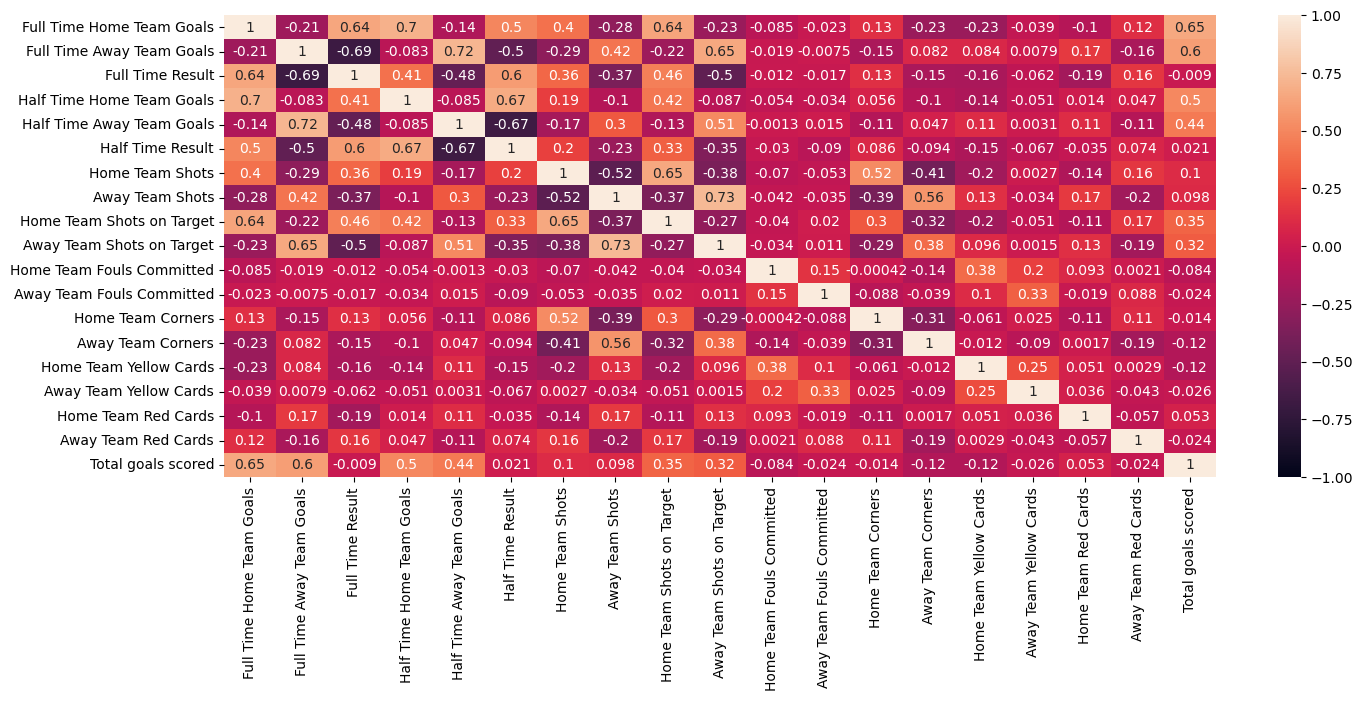

In [149]:
#Creating a heatmap of the correlation matrix for better visualization
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)

**Inference** : *From the pairwise correlation matrix shown above we can infer the below correlations*

- Full Time Home Team Goals has a strong positive correlation with Home Team Shots on Target, which means more the shots Home team has on target the higher chance for the home team to score more goals. Also it can be seen that Home Team Shots on Target has more effect on the Full Time Home team goals than the Home Team Shots

- Similarly, It can be seen that Full Time Away Team Goals has a strong positive correlation with Away Team shots on target

- Total goals scored has a strong positive correlation with Full Time Home Team Goals and Full Time Away Team Goals as it is essentially the sum of both of these columns

- Another major correlations in the figure is between Shots and Corner, Away Team Shots and Away Team corners has a good positive correlation and Home Team shots and Home Team corners has a good positive correlation. However, it should be noted that this effect is not translated to shots on target for the Home team as the correlation is negative between Home team shots on target and Home team corners but for the Away team the correlation is positive. So we can infer that Away team had a better translation from Corners to shots on target

- 'Full Time Result' column has a strong positive correlation with 'Full Time Home Team Goals' and strong negative correlation with 'Full Time Away Team Goals'. This indicates that changes in these variables can have a major impact to the value of Full time result. So while creating a model for predicting the full time results, both these column would be crucial to the accuracy of the predictions

# Q1(f) 
Create 4 new columns such that, over their 19 games,‘H_score’ is each home teams mean of ‘Full Time Home Team Goals’,
‘A_score’, is each away teams mean of ‘Full Time Away Team Goals’, ‘H_conceed’ is each home teams mean of ‘Full Time Away Team Goals’, ‘A_conceed’ is each away teams mean of ‘Full Time Home Team Goals’.
Ensure you average over the Home Team or the Away Team appropriately. Finally, remove the 15 columns ‘Half Time Home Team Goals’, ‘Half Time Away Team Goals’, ‘Half Time Result’, ‘Home Team Shots’, ‘Away Team Shots’, ‘Home Team Shots on Target’, ‘Away Team Shots on Target’, ‘Home Team Fouls Committed’, ‘Away Team Fouls Committed’,‘Home Team Corners’, ‘Away Team Corners’, ‘Home Team Yellow Cards’, ‘Away Team Yellow Cards’, ‘Home Team Red Cards’, ‘Away Team Red Cards’. (5 marks)

In [150]:
# Defining function to calculate mean of columns

def goals_mean(column):
    return column.mean()

# Below code creates 'H_Score' column which is the mean of Full Time Home Goals of each home team

football_Results_new['H_Score'] = football_Results_new.groupby('HomeTeam')['Full Time Home Team Goals'].transform(goals_mean)

# Below code creates 'A_Score' column which is the mean of Full Time Away Goals of each away team

football_Results_new['A_Score'] = football_Results_new.groupby('AwayTeam')['Full Time Away Team Goals'].transform(goals_mean)

# Below code creates 'H_conceed' column which is the mean of Full Time Away team Goals of each home team

football_Results_new['H_conceed'] = football_Results_new.groupby('HomeTeam')['Full Time Away Team Goals'].transform(goals_mean)

# Below code creates 'A_conceed' column which is the mean of Full Time Home Goals of each away team

football_Results_new['A_conceed'] = football_Results_new.groupby('AwayTeam')['Full Time Home Team Goals'].transform(goals_mean)

# Removing 15 columns that are not required 

football_Results_new = football_Results_new.drop(columns=[ 'Half Time Home Team Goals', 'Half Time Away Team Goals', 'Half Time Result', 'Home Team Shots', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Team Fouls Committed', 'Away Team Fouls Committed','Home Team Corners', 'Away Team Corners', 'Home Team Yellow Cards', 'Away Team Yellow Cards', 'Home Team Red Cards', 'Away Team Red Cards'])


In [151]:
print(football_Results_new.shape)

(380, 10)


In [152]:
football_Results_new

,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Total goals scored,H_Score,A_Score,H_conceed,A_conceed
309,Crystal Palace,Brentford,0,0,1,0,1.421053,1.368421,0.894737,1.842105
310,Southampton,West Ham,0,0,1,0,1.210526,1.421053,1.263158,1.315789
311,Man City,Southampton,0,0,1,0,3.052632,1.052632,0.789474,2.263158
312,Burnley,Norwich,0,0,1,0,0.947368,0.578947,1.315789,2.157895
313,Brighton,Arsenal,0,0,1,0,1.000000,1.368421,1.210526,1.631579
...,...,...,...,...,...,...,...,...,...,...
23976,Norwich,Tottenham,0,5,0,5,0.631579,1.631579,2.263158,1.105263
24026,Wolves,Man City,1,5,0,6,1.052632,2.157895,1.315789,0.578947
24027,Watford,Leicester,1,5,0,6,0.894737,1.473684,2.421053,1.894737
24076,Everton,Watford,2,5,0,7,1.421053,0.894737,1.315789,1.631579


# Q1 (g)
Now create two functions ‘probh’ and ‘proba’. Each function has inputs a and b. The functions iterate through i = 0 to 5 and j = 0 to 5 and calculates  $$p_{i,j} = ((a^i b^j)/(i! j!)) exp(-a-b)$$. The function ‘probh’ returns the value of i that maximises p whilst the function ‘proba’ returns the value of j that maximises p. Also introduce a function called ‘shift’ which has 2 inputs a and b:

shift(a,b) = 2 if a>b, 1 if a=b , and 0 if a<b. 

Now introduce 5 new columns named ‘HLamb’, ‘ALamb’, ‘HPredict’, ‘APredict’ and ‘RPredict’. Define 2 of the columns using

‘HLamb’ = ‘H_score’ × 0.56 + ‘A_conceed’ × 0.29 + 0.48,

‘ALamb’=‘A_score’ × 0.76 + ‘A_conceed’ × 0.4 + 0.21,

(These parameter values have been chosen to give a better fit in this data set). Define the other 3 columns using 

Define the other 3 columns using

‘HPredict’ = probh(‘HLamb’,‘ALamb’)

‘APredict’ = proba(‘HLamb’,‘ALamb’)

‘RPredict’ = shift(‘HPredict’,‘APredict’).

In [153]:
import math as math # To use in-built factorial function

# Function definition for probh function

def probh(a, b):
    max_i = 0
    p = 0
    for i in range(6):
        for j in range(6):
            numerator = (a**i) * (b**j)
            denominator = math.factorial(i) * math.factorial(j)
            multiplying_factor = math.exp(-a-b)
            p_new = (numerator / denominator) * multiplying_factor
            if p_new > p:
                p = p_new
                max_i = i
    return max_i

# Function definition for proba function

def proba(a, b):
    max_j = 0
    p = 0
    for i in range(6):
        for j in range(6):
            numerator = (a**i) * (b**j)
            denominator = math.factorial(i) * math.factorial(j)
            multiplying_factor = math.exp(-a-b)
            p_new = (numerator / denominator) * multiplying_factor
            if p_new > p:
                p = p_new
                max_j = j
    return max_j

# Function definition for shift function
def shift(a, b):
    if a > b:
        return 2
    elif a == b:
        return 1
    else:
        return 0
    
# Below function definitions helps in applying functions using multiple columns of dataframe
# Defining function to call probh function
def apply_probh(series):
    return probh(series['HLamb'], series['ALamb'])

# Defining function to call proba function
def apply_proba(series):
    return proba(series['HLamb'], series['ALamb'])

# Defining function to call shift function
def apply_shift(series):
    return shift(series['HPredict'], series['APredict'])

In [154]:
# Creating HLamb and ALamb columns

football_Results_new['HLamb'] = (football_Results_new['H_Score'] * 0.56 + football_Results_new['A_conceed'] * 0.29) + 0.48
football_Results_new['ALamb'] = (football_Results_new['A_Score'] * 0.76 + football_Results_new['H_conceed'] * 0.4) + 0.21

# Creating 'HPredict' , 'APredict' and 'RPredict' columns

football_Results_new['HPredict'] = football_Results_new.apply(apply_probh, axis=1)
football_Results_new['APredict'] = football_Results_new.apply(apply_proba, axis=1)
football_Results_new['RPredict'] = football_Results_new.apply(apply_shift, axis=1)

In [155]:
print(football_Results_new.shape)

(380, 15)


In [156]:
football_Results_new

,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Total goals scored,H_Score,A_Score,H_conceed,A_conceed,HLamb,ALamb,HPredict,APredict,RPredict
309,Crystal Palace,Brentford,0,0,1,0,1.421053,1.368421,0.894737,1.842105,1.810000,1.607895,1,1,1
310,Southampton,West Ham,0,0,1,0,1.210526,1.421053,1.263158,1.315789,1.539474,1.795263,1,1,1
311,Man City,Southampton,0,0,1,0,3.052632,1.052632,0.789474,2.263158,2.845789,1.325789,2,1,2
312,Burnley,Norwich,0,0,1,0,0.947368,0.578947,1.315789,2.157895,1.636316,1.176316,1,1,1
313,Brighton,Arsenal,0,0,1,0,1.000000,1.368421,1.210526,1.631579,1.513158,1.734211,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23976,Norwich,Tottenham,0,5,0,5,0.631579,1.631579,2.263158,1.105263,1.154211,2.355263,1,2,0
24026,Wolves,Man City,1,5,0,6,1.052632,2.157895,1.315789,0.578947,1.237368,2.376316,1,2,0
24027,Watford,Leicester,1,5,0,6,0.894737,1.473684,2.421053,1.894737,1.530526,2.298421,1,2,0
24076,Everton,Watford,2,5,0,7,1.421053,0.894737,1.315789,1.631579,1.748947,1.416316,1,1,1


# Q1(h)
Now copy the dataframe and remove the 4 columns ‘HomeTeam’, ‘AwayTeam’, ‘Full Time Home Team Goals’ and ‘Full Time Away Team Goals’. You are going to try to predict ‘Full Time Result’ using the remaining columns. Now split the data into (80%) training data and (20%) test data. Create any regression model you like using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error.

In [157]:
# Copying the dataframe

football_Results_copy = football_Results_new.copy()
football_Results_copy = football_Results_copy.drop(columns=['HomeTeam', 'AwayTeam', 'Full Time Home Team Goals', 'Full Time Away Team Goals'])

# Preparing data for the model training and testing

X_data = football_Results_copy.drop(columns=['Full Time Result']).to_numpy(dtype=np.float64)
Y_data = football_Results_copy['Full Time Result'].to_numpy(dtype=np.float64)

#max_min normalisation

X_min = np.min(X_data, axis=0)
X_max = np.max(X_data, axis=0)
Y_min = np.min(Y_data, axis=0)
Y_max = np.max(Y_data, axis=0)

# calculating normalised data sets

X_norm=(X_data-X_min)/(X_max-X_min)
Y_norm=(Y_data-Y_min)/(Y_max-Y_min)

# Splitting the updated dataframe to create training data and test data

X_py_train, X_py_test, Y_py_train, Y_py_test = train_test_split(X_norm, Y_norm, test_size=0.2, random_state=1)



In [158]:
#Importing required libraries for creating regression model
import torch 
import torch.nn as nn #importing neural network module from Pytorch
import torch.optim as optim # For optimizing the model

#converting the datasets to pytorch tensor variables for training and testing the model
X_train_tensor = torch.FloatTensor(X_py_train)
X_test_tensor = torch.FloatTensor(X_py_test)
Y_train_tensor = torch.FloatTensor(Y_py_train).view(-1, 1)
Y_test_tensor = torch.FloatTensor(Y_py_test).view(-1,1)


#Defining the regression model
class regModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        #Adding the layers of neural network according to the input and hidden dimensions
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.nonlinear2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        self.nonlinear4 = nn.ReLU()
        self.linear5 = nn.Linear(hidden_dim, hidden_dim)
        self.nonlinear6 = nn.ReLU()
        #final layer output should be in the output dimension defined
        self.linear7 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        #Defining data set transmission through the neural network
        out1 = self.linear1(x)
        out2 = self.nonlinear2(out1)
        out3 = self.linear3(out2)
        out4 = self.nonlinear4(out3)
        out5 = self.linear5(out4)
        out6 = self.nonlinear6(out5)
        out7 = self.linear7(out6)
        return out7

In [159]:
#Calculating train dataset shape to feed as input features count for the model
input_dim = X_train_tensor.shape[1]

#Defining the number of hidden layers of the neural network
hidden_dim = 100

#defining the number of outputs of the neural network
output_dim = 1

#Initializing the regression model
model = regModel(input_dim, hidden_dim, output_dim)

#Here MSELoss criterion is used as we are working on a regression model and not a classification model
criterion = nn.MSELoss()

#Defining the learning rate for the model
learning_rate = 0.10

#Initializing the optimizer for the model
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#Training the model with epochs of 100
for iter in range(0,100):
    #Propagating the train dataset through the neural network model
    outputs = model(X_train_tensor)
    
    #Calculating loss using the defined criterion
    loss = criterion(outputs, Y_train_tensor)
    
    #Optimization and backward pass for the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()     

    if iter % 10 == 0:
        # Printing the loss and iteration count
        print("Iteration: {}. Loss: {}".format(iter, loss)) 

Iteration: 0. Loss: 0.5876259803771973
Iteration: 10. Loss: 0.17717333137989044
Iteration: 20. Loss: 0.16619400680065155
Iteration: 30. Loss: 0.15580138564109802
Iteration: 40. Loss: 0.14726926386356354
Iteration: 50. Loss: 0.14124317467212677
Iteration: 60. Loss: 0.13766968250274658
Iteration: 70. Loss: 0.13540244102478027
Iteration: 80. Loss: 0.13378123939037323
Iteration: 90. Loss: 0.1325111985206604


In [160]:
# Testing the model
outputs = model(X_test_tensor)

# calculating the predictions of the model
predicted=torch.max(outputs.data, 1).values

# Set total error and total values
total_error=0
total=0

for i in range(0,len(Y_test_tensor)):
    total += Y_test_tensor[i]**2
    total_error += (Y_test_tensor[i]-predicted[i])**2

#Calculation of mean error and mean value
print('mean error',np.sqrt(total_error/len(Y_test_tensor)),'mean value',np.sqrt(total/len(Y_test_tensor)))

mean error tensor([0.3955]) mean value tensor([0.6689])


In [161]:
#Calculating the training and testing error of the model
print("Training Error = ", criterion(model(X_train_tensor), Y_train_tensor))
print("Testing Error = ", criterion(model(X_test_tensor), Y_test_tensor))

Training Error =  tensor(0.1315, grad_fn=<MseLossBackward0>)
Testing Error =  tensor(0.1564, grad_fn=<MseLossBackward0>)


In [162]:
#Calculating major performance metrics of the regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: ", mean_absolute_error(Y_test_tensor, predicted))
print("Mean Squared Error: ", mean_squared_error(Y_test_tensor, predicted))
print("R-squared: ", r2_score(Y_test_tensor, predicted))

Mean Absolute Error:  0.32269365
Mean Squared Error:  0.15640064
R-squared:  0.15016915862997304


**Comment:** *The training error and testing error are relatively low and their values are close to each other. This indicates that the model has a reasonable generalization to new data. Also it indicates that the model is not overfitting the training data.*

# Q1(i)
Using SQLite Studio. Read in the csv file 'Football.csv' to create a table. Remove the column named 'Referee'. In the 'League_Division' column remove the letter 'E'. Convert all of the dates to a single number such that dates in the first 7 months take the last 2 digits of the year minus 11 and the dates in the last 5 months of the year take the last 2 digits of the year minus 10. (8 marks)